In [1]:
# Importing Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import re
import demoji
# import spacy
import nltk
from nltk import word_tokenize
import inflect
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#### Data Preprocessing - Text Preprocessing


In [2]:
zomato = pd.read_csv('zomato.csv') # Creating Dataframe for both dataset with their names


In [3]:
zomato.info() # Checking for the info of the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264869 entries, 0 to 264868
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   App                      264869 non-null  object
 1   review_date              264869 non-null  object
 2   review_description       264869 non-null  object
 3   rating                   264869 non-null  int64 
 4   thumbsUpCount            264869 non-null  int64 
 5   developer_response       99149 non-null   object
 6   developer_response_date  99149 non-null   object
 7   appVersion               233371 non-null  object
dtypes: int64(2), object(6)
memory usage: 16.2+ MB


In [4]:
# Checking Null Values from the Zomato data
for i , j in zomato.isnull().sum().iteritems():
    if j != 0:
        print(f'[{i} : {j}]',end='      ')

[developer_response : 165720]      [developer_response_date : 165720]      [appVersion : 31498]      

In [5]:
zomato = zomato[['App','review_description','rating']] # With important columns Creating A new Dataframes

Data Visualisation 

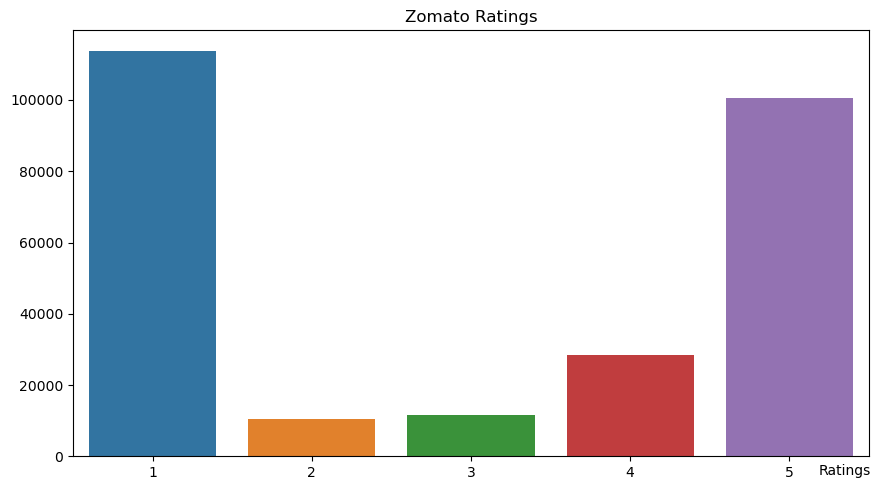

In [6]:
# Calculating The Datapoints Belongs to each Target Variable Class
fig = plt.figure(figsize=(17, 5))

ax1 = fig.add_subplot(1, 2, 1)  # 2 rows, 1 column, subplot 1

sns.barplot(x=zomato['rating'].value_counts().index, y=zomato['rating'].value_counts().values, ax=ax1)
ax1.set_title('Zomato Ratings')


fig.text(0.5, 0.04, 'Ratings', ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

(-1.1277306365985225,
 1.121830950208052,
 -1.1199275430330933,
 1.1009489306206235)

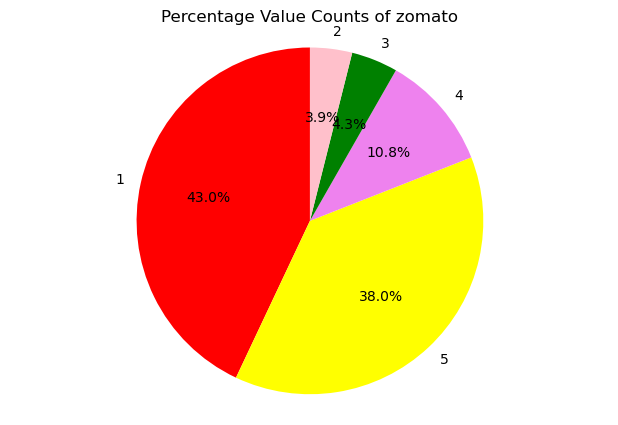

In [7]:
# Calculating The Percentages of The Each Class Value in Data
fig = plt.figure(figsize=(17, 5))

ax1 = fig.add_subplot(1, 2, 1)  # 2 rows, 1 column, subplot 1
zomato_rating = zomato['rating'].value_counts(normalize=True) * 100


ax1.pie(zomato_rating, labels=zomato_rating.index, autopct='%1.1f%%', startangle=90,colors= ['red','yellow','violet','green','pink'])
ax1.set_title('Percentage Value Counts of zomato')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


In [8]:
print('Zomato')
for i, j in zomato_rating.iteritems():
    print(f'[{i} : {j}]', end=' ')


Zomato
[1 : 42.985777875100524] [5 : 37.98217231914644] [4 : 10.772872627600814] [3 : 4.335728227916442] [2 : 3.923448950235777] 

In [9]:
zomato['review_description'] = zomato['review_description'].str.lower() # bring The All reviews in Lower Case 

Demojize emoticons

In [10]:
zomato['review_description'][0]

"so basically , it's the best approach you'll ever find 😉 , like it has every restaurant you could ever find in your city !!! ans isn't every delivery on time !,) just 2 negative points for zomato that some orders take a very long period of time and some times the order prices are too high . no doubt this is the best food ordering app but some sort of silly things are not convenient. so kindly fix these problems 🙏"

In [12]:
# Handling Emojis From The Dataset By Demojize operation on text
demoji.download_codes()
def demojize_emoticons(text):
    demojis_text =  demoji.replace_with_desc(text)
    return demojis_text

In [14]:
demojize_emoticons(zomato['review_description'][0])

"so basically , it's the best approach you'll ever find :winking face: , like it has every restaurant you could ever find in your city !!! ans isn't every delivery on time !,) just 2 negative points for zomato that some orders take a very long period of time and some times the order prices are too high . no doubt this is the best food ordering app but some sort of silly things are not convenient. so kindly fix these problems :folded hands:"

In [15]:
zomato['review_description'] = zomato['review_description'].apply(demojize_emoticons)

In [16]:
contractions = {
    "ain't": "are not", "aren't": "are not",  "can't": "cannot", "could've": "could have", "couldn't": "could not",
    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",  "he'd": "he had or he would", "he'll": "he will or he shall","he's": "he is or he has","how'd": "how did or how would", "how'll": "how will","how's": "how is or how does", "I'd": "I had or I would",  "I'll": "I will", "I'm": "I am",  "I've": "I have",  "isn't": "is not", "it'd": "it would", "it'll": "it will",  "it's": "it is", "let's": "let us", "might've": "might have",  "must've": "must have",  "mustn't": "must not", "needn't": "need not",  "shan't": "shall not",  "she'd": "she had or she would",  "she'll": "she will",  "she's": "she is or she has","should've": "should have",
"shouldn't": "should not", "that'd": "that would",  "that's": "that is",  "there'd": "there would","there'll": "there will", "there're": "there are", "there's": "there is",  "they'd": "they had or they would",  "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we had  or  we would", "we'll": "we will",
    "we're": "we are", "we've": "we have",   "weren't": "were not",   "what'd": "what did or what would", "what'll": "what will",  "what're": "what are", "what's": "what is",  "what've": "what have", "when's": "when is","where'd": "where did or where would", "where'll": "where will", "where're": "where are",  "where's": "where is",  "where've": "where have",
"who'd": "who had or who would",  "who'll": "who will",  "who're": "who are",  "who's": "who is", "who've": "who have",   "why'd": "why did or why would",  "why'll": "why will",  "why're": "why are", "why's": "why is",  "won't": "will not","would've": "would have", "wouldn't": "would not", "you'd": "you had or you would","you'll": "you will",
 "you're": "you are","you've": "you have"
}

Replacing Contractions with root words 

In [17]:
def replace_contractions(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        if word.lower() in contractions:
            new_sentence.append(contractions[word.lower()])
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

In [18]:
zomato['review_description'] = zomato['review_description'].apply(replace_contractions)

In [19]:
def tokenize(text):
    clean_text = word_tokenize(text)
    return clean_text

In [20]:
zomato['review_description'] = zomato['review_description'].apply(tokenize)

In [21]:
zomato['review_description'].head()

0    [so, basically, ,, it, is, the, best, approach...
1    [always, late, delivery, ., no, change, ., lat...
2    [this, app, is, froude, with, their, zomato, g...
3    [i, tried, 100, times, adding, an, alternate, ...
4    [in, recent, years, ,, zomato, support, has, b...
Name: review_description, dtype: object

Removing Non Alphabetical Characters

In [22]:
def remove_num(text):
    number_match = re.search(r'\d+', text)
    if number_match:
        number = int(number_match.group())
    else:
        number = None
    new_sentence = re.sub(r'\d+', '', text)
    return new_sentence

In [23]:
zomato['review_description'] = zomato['review_description'].str.join(' ')

In [24]:
zomato['review_description'] = zomato['review_description'].apply(remove_num)

In [25]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Removing Punctuations

In [26]:
def remove_punctuations(text):
    cleaned_text = []
    for word in text.split():
        contains_punctuation = False
        for char in word:
            if char in punctuation:
                contains_punctuation = True
                break
        if not contains_punctuation:
            cleaned_text.append(word)
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [27]:
zomato['review_description'] = zomato['review_description'].apply(remove_punctuations)

In [32]:
zomato.to_csv('zomato_preprocessed.csv',index=False)

In [28]:
zomato = pd.read_csv('zomato_preprocessed.csv')

In [29]:
print(zomato.isnull().sum())
zomato.dropna(inplace=True)

review_description    1
rating                0
dtype: int64


WordCloud Plot 

In [30]:
from wordcloud import WordCloud

Plotting WordCloud Plot for each of The rating in Zomato


Rating : 1



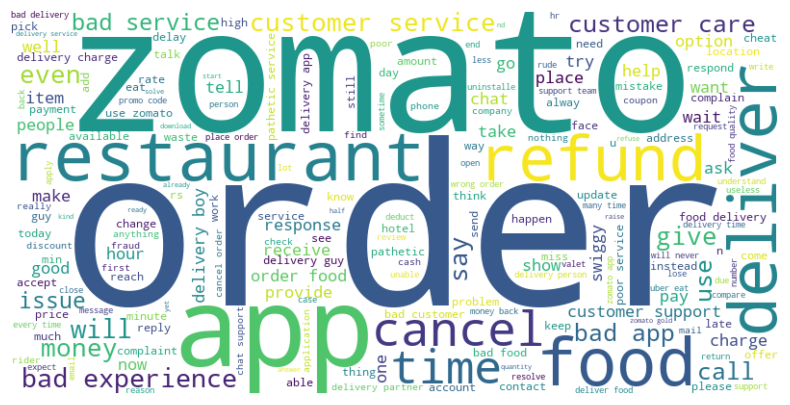


Rating : 2



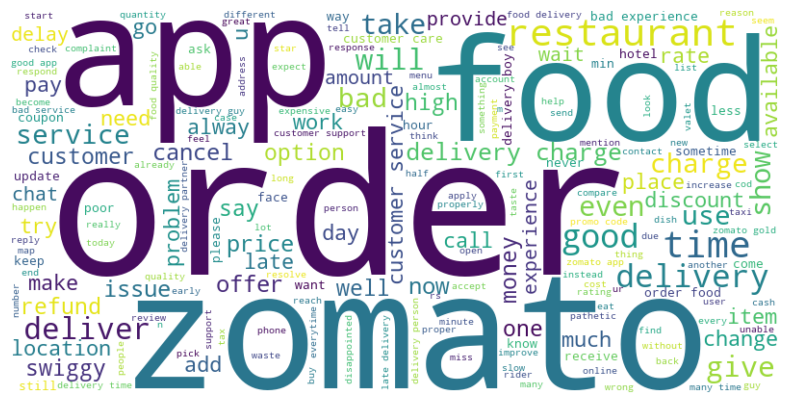


Rating : 3



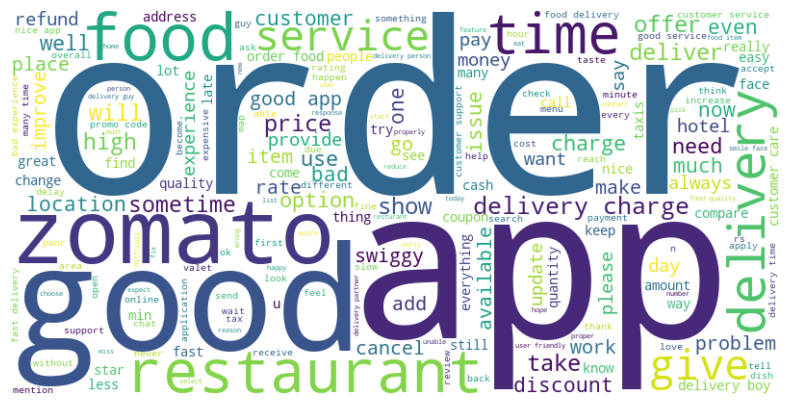


Rating : 4



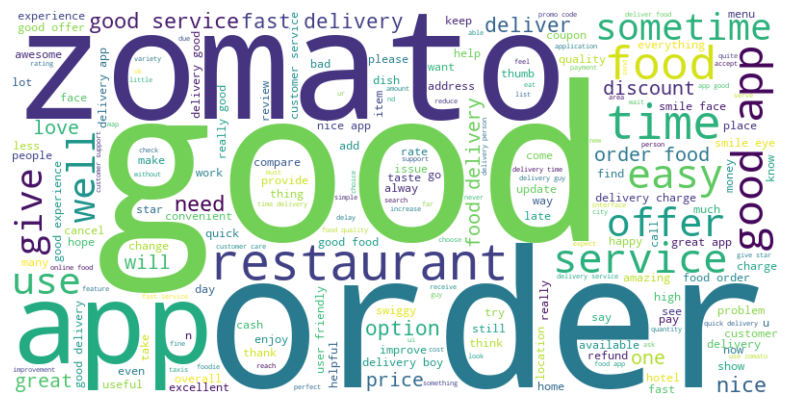


Rating : 5



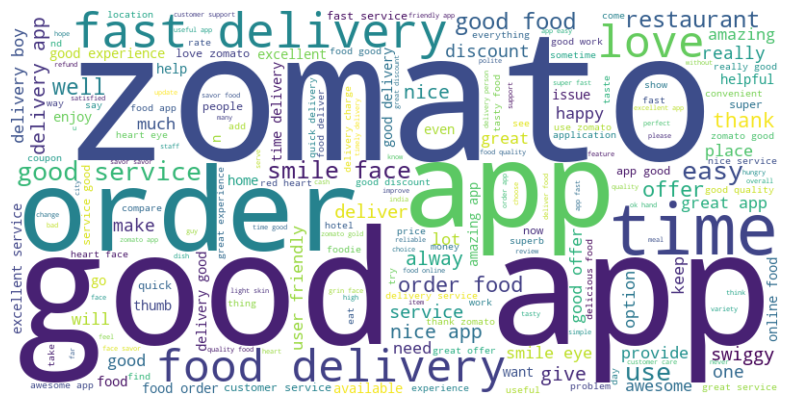

Wall time: 29.3 s


In [31]:
%%time
for i in range(1,6):
    text = ' '.join(zomato[zomato['rating'] == i]['review_description'])
    print(f'\nRating : {i}\n')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Creating Dictionay of list of Words in Each of The Rating Categories And The assigning The Rating Values as key for the Respective List 

In [32]:
zomato_text = {}
zomato_word_list = {}
zomato_sets = {}
for i in range(1,6):
    text = ' '.join(zomato[zomato['rating'] == i]['review_description'])
    words = ' '.join(zomato[zomato['rating'] == i]['review_description']).split()
    zomato_text[i] = text
    zomato_word_list[i] = words
    zomato_sets[i] = set(words)
    print(f'Rating {i} : word list and combined text with their set created successfully')

Rating 1 : word list and combined text with their set created successfully
Rating 2 : word list and combined text with their set created successfully
Rating 3 : word list and combined text with their set created successfully
Rating 4 : word list and combined text with their set created successfully
Rating 5 : word list and combined text with their set created successfully


Intersection of sets of each categories with each other

In [33]:
zintersection_dict = {}
zintersection_len_dict = {}

for i in range(1, 6):
    for j in range(i + 1, 6):  # Start j from i+1 to avoid processing duplicates
        intersection = zomato_sets[i].intersection(zomato_sets[j])
        print(f'\n{i}-{j}: {len(intersection)}')
        
        key = f'{i}-{j}'
        zintersection_dict[key] = intersection
        zintersection_len_dict[key] = len(intersection)


1-2: 6447

1-3: 5910

1-4: 7162

1-5: 10155

2-3: 4193

2-4: 4618

2-5: 5400

3-4: 4506

3-5: 5232

4-5: 6649


In [34]:
From The Graph highest Number of Most common words are present between rating values 1 and 5, 

SyntaxError: invalid syntax (2396560759.py, line 1)

<AxesSubplot:>

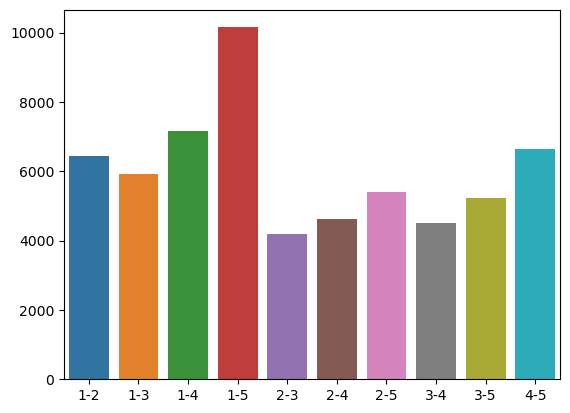

In [35]:
sns.barplot(x=list(zintersection_len_dict.keys()),y=list(zintersection_len_dict.values()))

Distribution of Common Words almost same 

In [37]:
print('number of common tokens(words) in zomato tokens: ',len(zomato_sets[1].intersection(zomato_sets[2],zomato_sets[3],zomato_sets[4],zomato_sets[5])))


number of common tokens(words) in zomato tokens:  3471


In [38]:
common_words_zomato = zomato_sets[1].intersection(zomato_sets[2],zomato_sets[3],zomato_sets[4],zomato_sets[5])



zomato



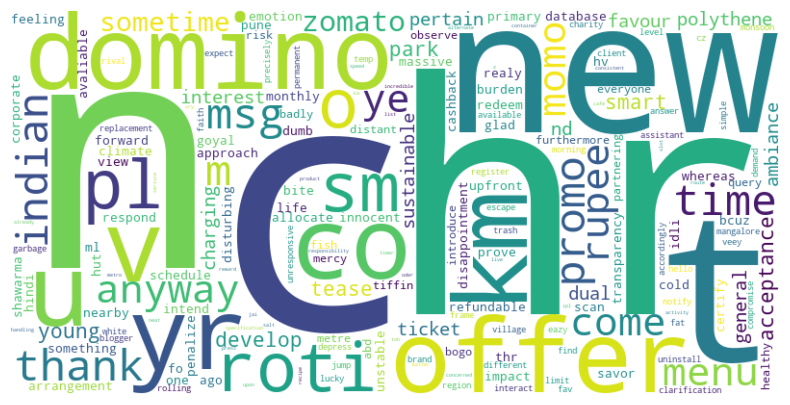

In [39]:
zm = ' '.join(common_words_zomato)
print(f'\nzomato\n')
wordcloudzm = WordCloud(width=800, height=400, background_color='white').generate(zm)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudzm, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
print(zomato['rating'].value_counts())
print('-------------------------------')

1    113493
5     96547
4     28075
3     11449
2     10375
Name: rating, dtype: int64
-------------------------------


In [41]:
zomato['rating'] = zomato['rating'].replace({1:'negative',2:'negative',3:'neutral',4:'positive',5:'positive'})


In [42]:
print(zomato['rating'].value_counts())
print('-------------------------------')


positive    124622
negative    123868
neutral      11449
Name: rating, dtype: int64
-------------------------------



Rating : positive



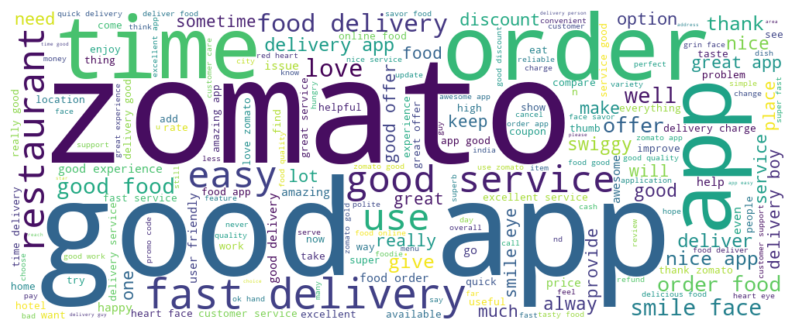


Rating : negative



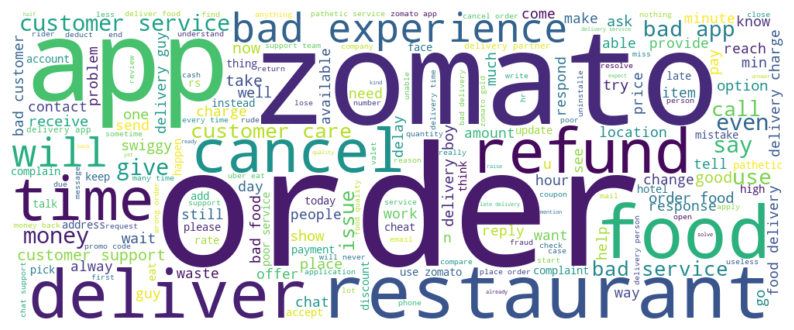


Rating : neutral



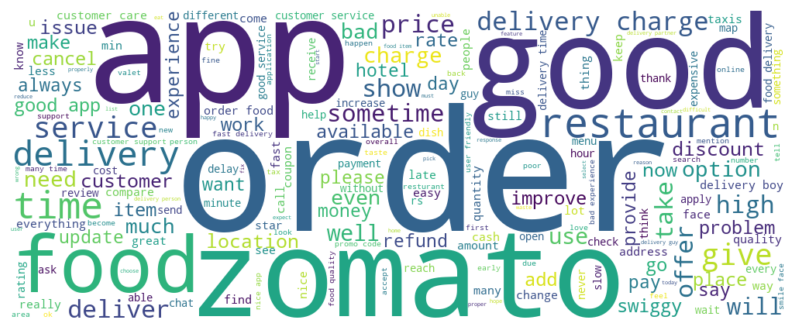

Wall time: 26.1 s


In [43]:
%%time
for i in ['positive','negative','neutral']:
    text = ' '.join(zomato[zomato['rating'] == i]['review_description'])
    print(f'\nRating : {i}\n')
    wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [45]:
rating_list = ['positive','negative','neutral']
zomato_text_new = {}
zomato_word_list_new = {}
zomato_sets_new = {}
for i in rating_list:
    text = ' '.join(zomato[zomato['rating'] == i]['review_description'])
    words = ' '.join(zomato[zomato['rating'] == i]['review_description']).split()
    zomato_text_new[i] = text
    zomato_word_list_new[i] = words
    zomato_sets_new[i] = set(words)
    print(f'Rating {i} : word list and combined text with their set created successfully')

Rating positive : word list and combined text with their set created successfully
Rating negative : word list and combined text with their set created successfully
Rating neutral : word list and combined text with their set created successfully


In [46]:
zintersection_dict_new = {}
zintersection_len_dict_new = {}

for i in rating_list:
    for j in rating_list:  # Start j from i+1 to avoid processing duplicates
        if i == j:
            continue
        intersection = zomato_sets_new[i].intersection(zomato_sets_new[j])
        print(f'\n{i}-{j}: {len(intersection)}')
        
        key = f'{i}-{j}'
        if key not in zintersection_dict_new:
            zintersection_dict_new[key] = intersection
            zintersection_len_dict_new[key] = len(intersection)



positive-negative: 11695

positive-neutral: 5551

negative-positive: 11695

negative-neutral: 5976

neutral-positive: 5551

neutral-negative: 5976


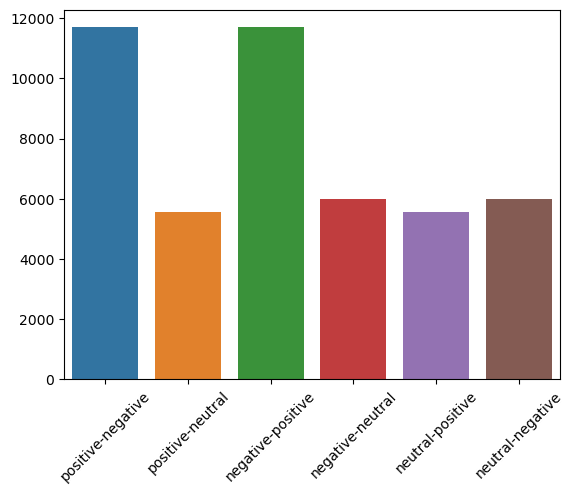

In [47]:
sns.barplot(x=list(zintersection_len_dict_new.keys())[::],y=list(zintersection_len_dict_new.values())[::])
plt.xticks(rotation = 45)
plt.show()

In [48]:
zm = zomato.copy()

In [49]:
zomato['no_of_tokens'] = zomato['review_description'].str.split().apply(len)
zomato['no_of_character'] = zomato['review_description'].apply(len)

In [54]:
print('Number of Tokens')
print('\nMaximum Length : ' , zomato['no_of_tokens'].max())
print('Minimum Length : ' ,zomato['no_of_tokens'].min())
print('Mean Length : ' ,zomato['no_of_tokens'].mean())
print('\n----------------------------------------------\n')
print('\nNumber of Character')
print('Maximum Length : ' , zomato['no_of_character'].max())
print('Minimum Length : ' ,zomato['no_of_character'].min())
print('Mean Length : ' ,zomato['no_of_character'].mean())

Number of Tokens

Maximum Length :  576
Minimum Length :  1
Mean Length :  24.959782872135385

----------------------------------------------


Number of Character
Maximum Length :  2997
Minimum Length :  5
Mean Length :  129.53723758266364


count    259939.000000
mean         24.959783
std          21.775445
min           1.000000
25%           9.000000
50%          18.000000
75%          32.000000
max         576.000000
Name: no_of_tokens, dtype: float64
******************************************************


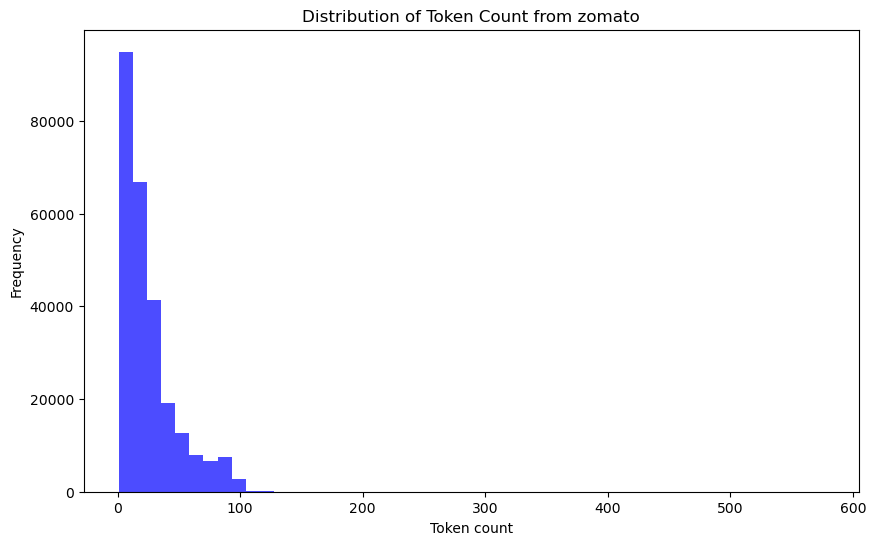

******************************************************


In [55]:
# Display basic statistics of text lengths
print(zomato['no_of_tokens'].describe())
print('******************************************************')

# Visualize the distribution of text lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(zomato['no_of_tokens'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Token Count from zomato')
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.show()

print('******************************************************')



count    259939.000000
mean        129.537238
std         110.623923
min           5.000000
25%          50.000000
50%          92.000000
75%         167.000000
max        2997.000000
Name: no_of_character, dtype: float64
******************************************************


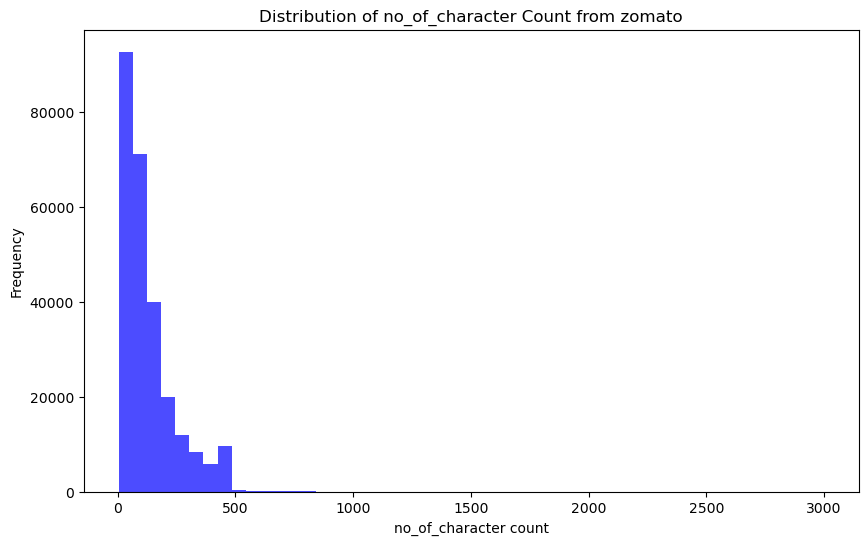

******************************************************


In [56]:
# Display basic statistics of text lengths
print(zomato['no_of_character'].describe())
print('******************************************************')

# Visualize the distribution of text lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(zomato['no_of_character'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of no_of_character Count from zomato')
plt.xlabel('no_of_character count')
plt.ylabel('Frequency')
plt.show()

print('******************************************************')



In [57]:
zomato_positive = ' '.join(zomato[zomato['rating'] == 'positive']['review_description'])
zomato_negative = ' '.join(zomato[zomato['rating'] == 'negative']['review_description'])
zomato_neutral = ' '.join(zomato[zomato['rating'] == 'neutral']['review_description'])


In [58]:
zomato_positive_tokens = zomato_positive.split()
zomato_negatives_tokens = zomato_negative.split()
zomato_neutral_tokens = zomato_neutral.split()


In [59]:
import nltk
from nltk import FreqDist

z_pos_dist = FreqDist(zomato_positive_tokens) 
z_neg_dist = FreqDist(zomato_negatives_tokens)
z_neu_dist = FreqDist(zomato_negatives_tokens)



In [60]:
print('The words Most number of times occurs in positive sentiment zomato\n')
print('\nZomato Positive text\n',z_pos_dist.most_common(50))
print('\nZomato Negative text\n',z_neg_dist.most_common(50))
print('\nZomato Neutral text\n',z_neu_dist.most_common(50))


The words Most number of times occurs in positive sentiment zomato


Zomato Positive text
 [('be', 83212), ('and', 67457), ('good', 64476), ('the', 51971), ('app', 51539), ('food', 44903), ('to', 42243), ('delivery', 41973), ('I', 39127), ('it', 34785), ('very', 33872), ('zomato', 31794), ('service', 29518), ('for', 26375), ('with', 26201), ('order', 25834), ('of', 22295), ('a', 20683), ('in', 18899), ('time', 18214), ('but', 16996), ('fast', 16780), ('this', 15381), ('have', 15126), ('not', 14610), ('on', 14446), ('face', 13758), ('offer', 13709), ('great', 13459), ('nice', 13350), ('you', 12541), ('easy', 10974), ('restaurant', 10810), ('love', 10541), ('use', 9743), ('my', 9425), ('they', 9090), ('experience', 9085), ('so', 9080), ('smile', 8799), ('well', 8636), ('also', 8033), ('thank', 8010), ('really', 7993), ('do', 7884), ('that', 7842), ('from', 7756), ('all', 7728), ('like', 7528), ('discount', 7235)]

Zomato Negative text
 [('be', 191656), ('the', 146899), ('I', 126471), ('n

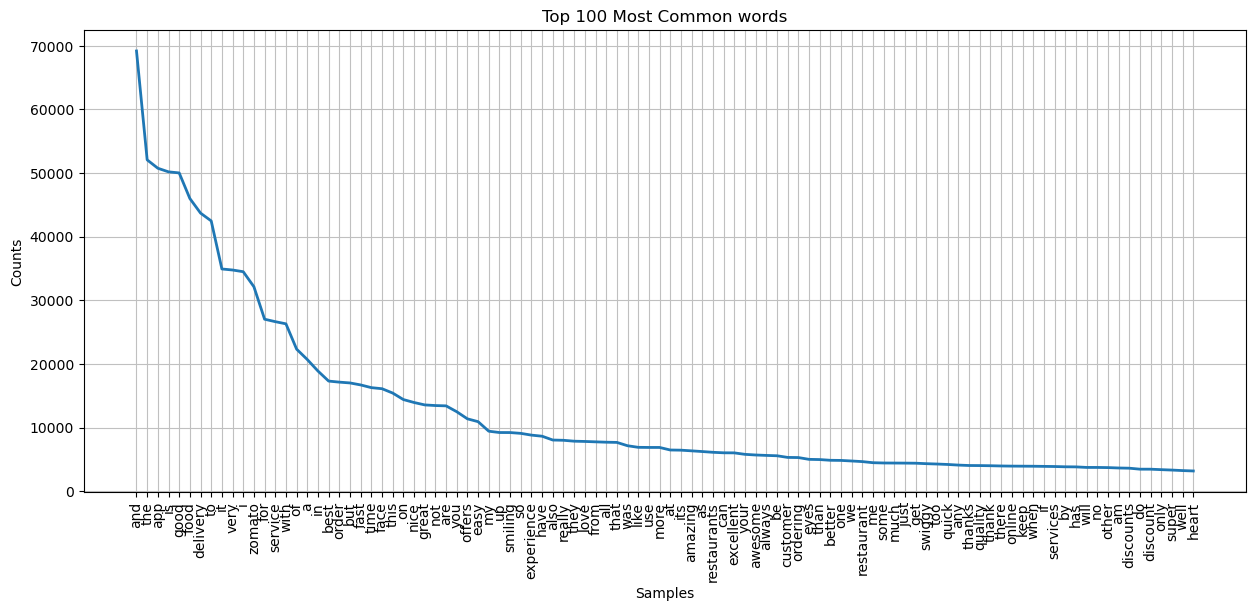

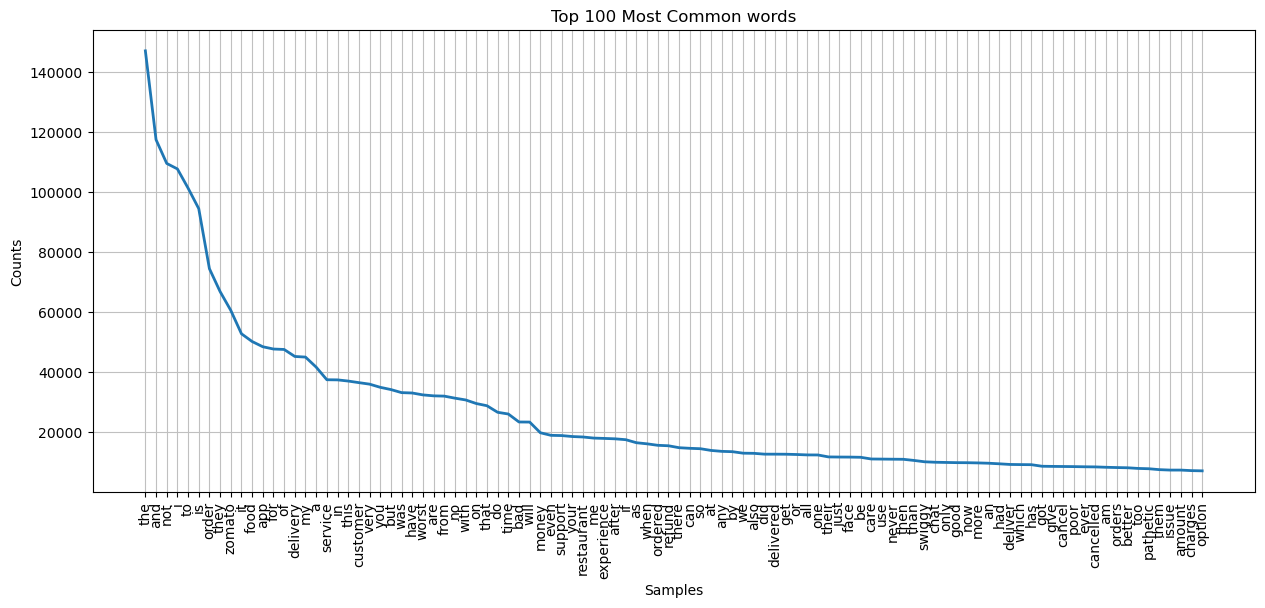

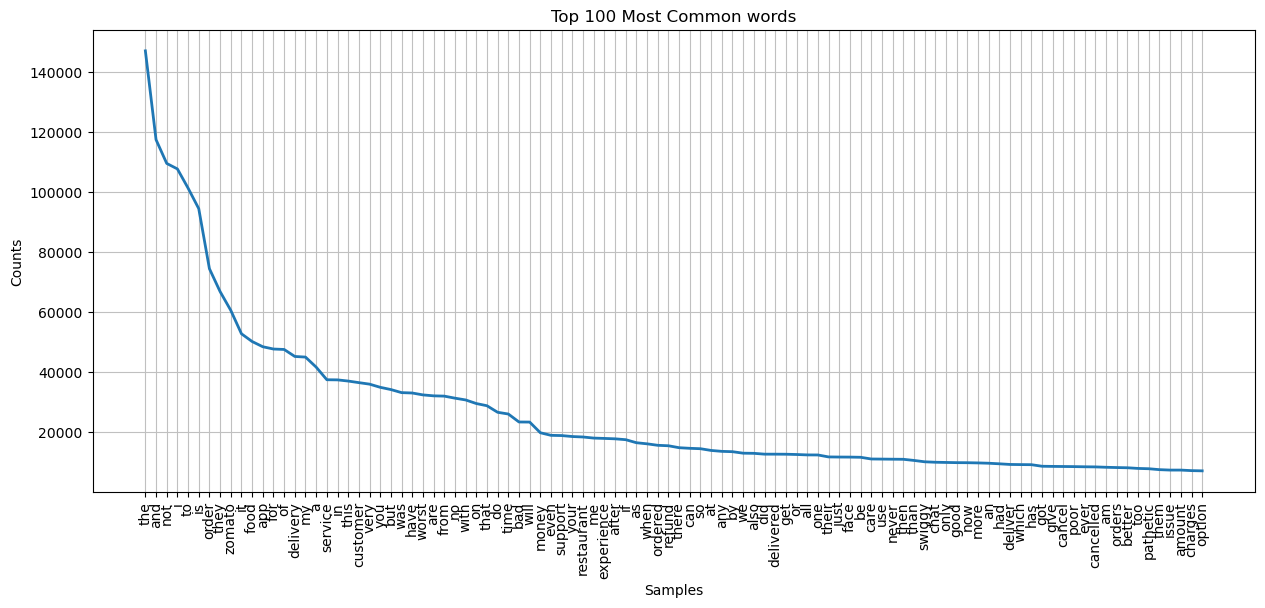

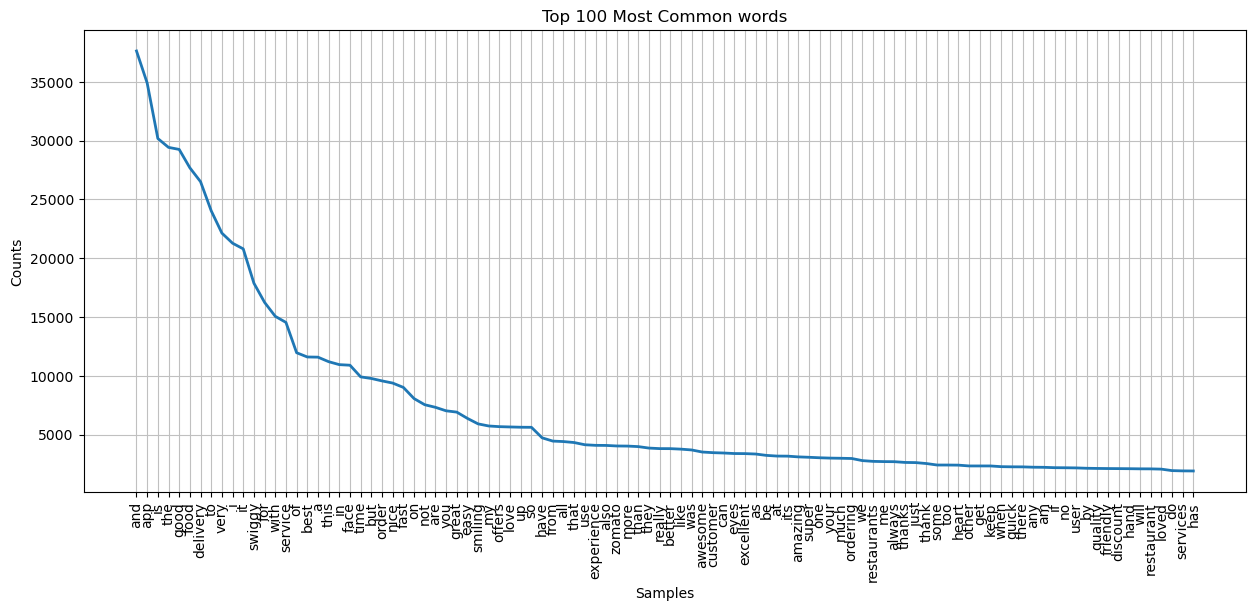

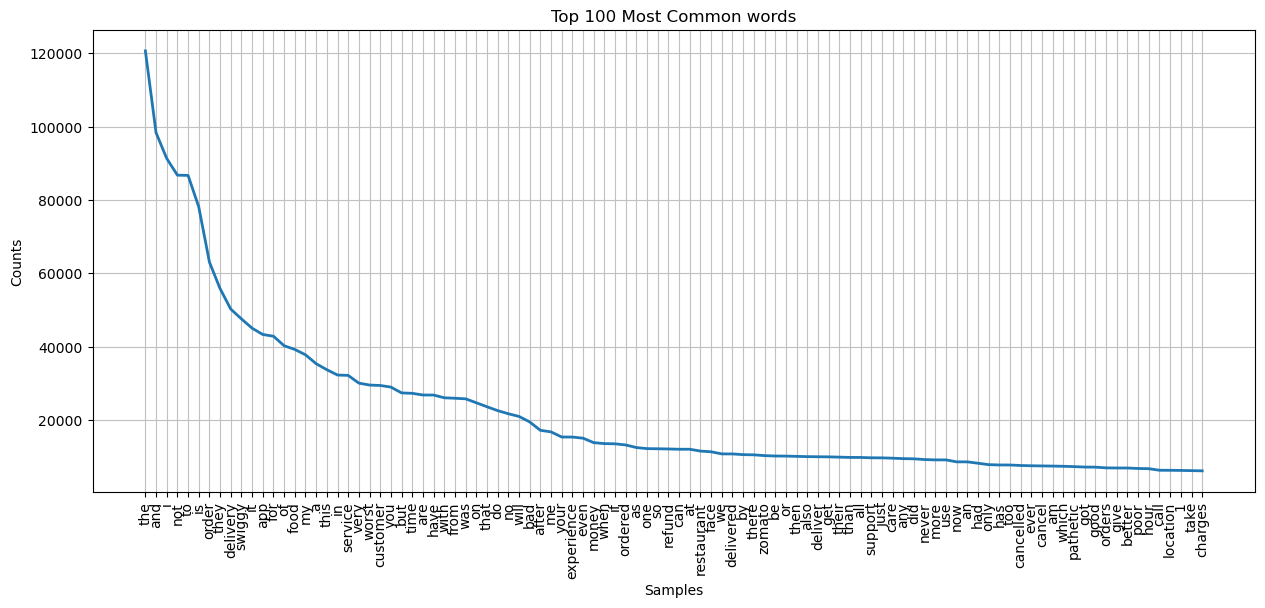

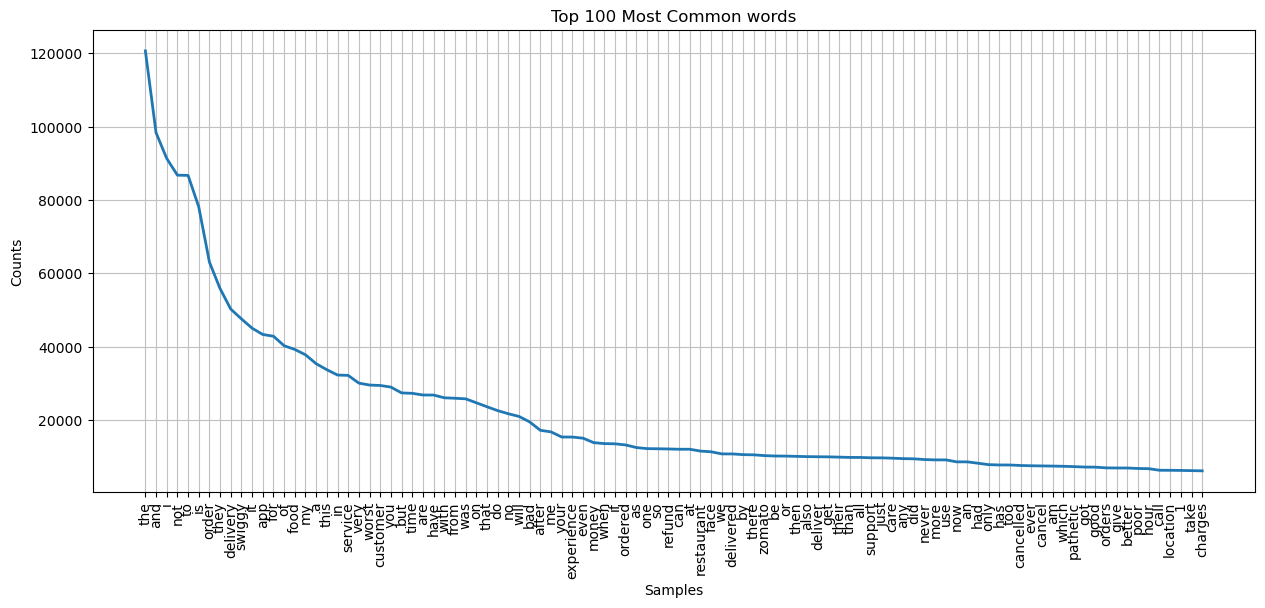

In [152]:
# Visualize word frequencies using a bar chart from positive class
for i in [z_pos_dist,z_neg_dist,z_neu_dist,s_pos_dist,s_neg_dist,s_neu_dist]:
    plt.figure(figsize=(15, 6))
    plt.title('Top 100 Most Common words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    i.plot(100, cumulative=False)

    plt.show() 

In [61]:
zomato = zomato[zomato['rating'] != 'neutral'].reset_index(drop=True)


In [62]:
zomato['rating'].value_counts()

positive    124622
negative    123868
Name: rating, dtype: int64

In [63]:
num_positive = len(zomato[zomato['rating'] == 'positive'])
num_to_delete = 5137
indices_to_delete = np.random.choice(zomato[zomato['rating'] == 'positive'].index, size=num_to_delete, replace=False)
zomato = zomato.drop(indices_to_delete)

In [64]:
num_positive = len(zomato[zomato['rating'] == 'negative'])
num_to_delete = 248
indices_to_delete = np.random.choice(zomato[zomato['rating'] == 'negative'].index, size=num_to_delete, replace=False)

zomato = zomato.drop(indices_to_delete)

In [65]:
zomato['rating'].value_counts()

negative    123620
positive    119485
Name: rating, dtype: int64

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
zomato_all_text = zomato['review_description'].str.cat(sep=' ')

In [68]:
zomato_words = zomato_all_text.split()

In [69]:
zunique_words = set(zomato_words)

In [70]:
len(zomato_words)

6124498

In [71]:
len(zunique_words)

42566